In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
columns = ["iteration", "train_loss", "valid_loss", "valid_acc", "time"]
columns2 = ["iteration", "train_loss", "valid_loss", "valid_acc", "valid_f1", "time"]

In [8]:
def plot_result(df, start_index = 0, end_index = -1):
    sub_df = df.iloc[start_index:end_index]
    plt.figure(figsize = (16, 10))
    plt.subplot(3, 1, 1)
    plt.title("loss plot")
    plt.plot(sub_df.iteration, sub_df.train_loss, color = "blue")
    plt.plot(sub_df.iteration, sub_df.valid_loss, color = "orange")
    
    plt.subplot(3, 1, 2)
    plt.title(f"f1 plot, max(min) value: {sub_df.valid_acc.max():.4f}")
    plt.plot(sub_df.iteration, sub_df.valid_acc, color = "red")
    plt.show()
    
def plot_result2(df, start_index = 0, end_index = -1):
    sub_df = df.iloc[start_index:end_index]
    plt.figure(figsize = (16, 10))
    plt.subplot(3, 1, 1)
    plt.title("loss plot")
    plt.plot(sub_df.iteration, sub_df.train_loss, color = "blue", label = "train loss")
    plt.plot(sub_df.iteration, sub_df.valid_loss, color = "orange", label = "valid loss")
    plt.legend()
    plt.subplot(3, 1, 2)
#     plt.title(f"f1 plot, max(min) value: {sub_df.valid_acc.max():.4f}")
    print(f"f1  score: {sub_df.valid_f1.max()}")
    print(f"acc score: {sub_df.valid_acc.max()}")
    plt.plot(sub_df.iteration, sub_df.valid_acc, color = "red", label = "accuracy")
    plt.plot(sub_df.iteration, sub_df.valid_f1, color = "orange", label = "f1 score")
    plt.axvline(x=sub_df.iteration.iloc[np.argmax(sub_df.valid_acc)], color = 'red', linestyle='--')
    plt.axvline(x=sub_df.iteration.iloc[np.argmax(sub_df.valid_f1)], color = 'orange', linestyle='--')
    plt.legend()
    plt.show()

In [9]:
# exp_name = "CrashV2Timing2"
def show_result(exp_name):
    path = os.path.join("saved_models/", exp_name, "log_train.csv")
    if os.path.isfile(path):
        history = pd.read_csv(path, header=None, names = columns)
        # 가장 마지막에 진행된 것 불러오기
        start_index = 1
        while start_index > 0:
            for idx in range(len(history)-1):
                ic = history.iloc[idx, 0]
                inn = history.iloc[idx+1, 0]
                if ic > inn:
                    history = history.iloc[idx + 1:]
                    break
                if idx == len(history) - 2:
                    start_index = -1
#                     print('no')
            
        plot_result(history)
    else:
        print("파일이 없어요")

def show_result2(exp_name):
    path = os.path.join("saved_models/", exp_name, "log_train.csv")
    if os.path.isfile(path):
        history = pd.read_csv(path)
        # 가장 마지막에 진행된 것 불러오기
        start_index = 1
        while start_index > 0:
            if len(history) == 0:
                print('something wrong!')
                break
            for idx in range(len(history)-1):
                ic = history.iloc[idx, 0]
                inn = history.iloc[idx+1, 0]
                if ic > inn:
                    history = history.iloc[idx + 1:]
                    break
                if idx == len(history) - 2:
                    start_index = -1
#                     print('no')
            
        plot_result2(history)
    else:
        print("파일이 없어요")


# 가장 마지막에 진행된 것 불러오기

f1  score: 1.0
acc score: 1.0


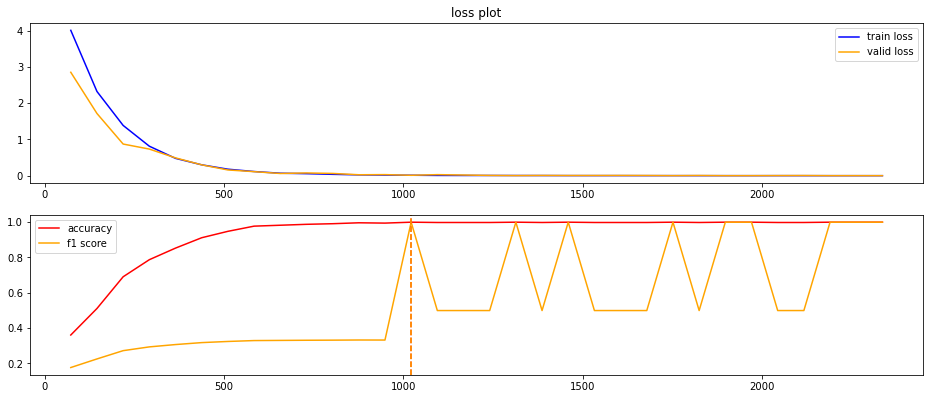

In [13]:
show_result2("ClassExampleV1_0")